In [1]:
"""
Compute Relative Strength Index (RSI) of stock time series in Python 
 
Source: 
 
 “New Concepts in Technical Trading Systems” (page 65, Section 6). 
by J. Welles Wilder Jr
 
Author:
    Aleksandar Haber
 
Date: January 25, 2021
Some parts of this code are inspired by the following sources:
     
-- https://www.datacamp.com/community/tutorials/pickle-python-tutorial
-- Pandas help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
-- "Learn Algorithmic Trading: Build and deploy algorithmic trading systems and strategies
using Python and advanced data analysis", by Sebastien Donadio and Sourav Ghosh
 
 
"""

'\nCompute Relative Strength Index (RSI) of stock time series in Python \n \nSource: \n \n “New Concepts in Technical Trading Systems” (page 65, Section 6). \nby J. Welles Wilder Jr\n \nAuthor:\n    Aleksandar Haber\n \nDate: January 25, 2021\nSome parts of this code are inspired by the following sources:\n     \n-- https://www.datacamp.com/community/tutorials/pickle-python-tutorial\n-- Pandas help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html\n-- "Learn Algorithmic Trading: Build and deploy algorithmic trading systems and strategies\nusing Python and advanced data analysis", by Sebastien Donadio and Sourav Ghosh\n \n \n'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# laod data
url = "Data/MANU.csv"
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,21.240000,21.600000,20.709999,20.940001,20.024546,25500
1,2018-11-01,21.100000,21.500000,20.809999,21.330000,20.397497,24700
2,2018-11-02,21.330000,21.490000,21.110001,21.260000,20.330559,19500
3,2018-11-05,21.370001,21.389999,21.010000,21.250000,20.320997,20300
4,2018-11-06,21.180000,21.740000,21.170000,21.740000,20.789572,25700


<Axes: >

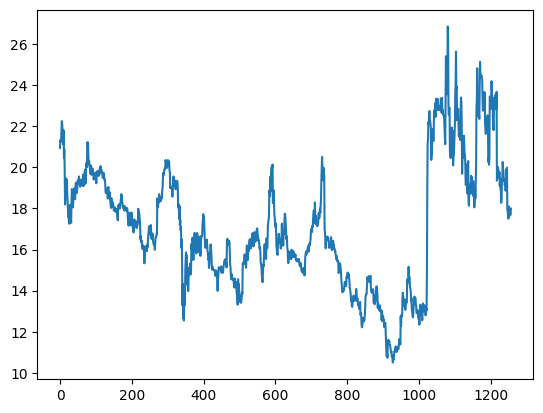

In [4]:
data['Close'].plot()

In [5]:
# define the period parameter for RSI
 
period_RSI=14

In [6]:
# isolate the closing price
closingPrice = data['Close']

In [7]:
differencePrice = data['Close'].diff()
differencePriceValues=differencePrice.values
 
positive_differences=0
negative_differences=0
current_average_positive=0
current_average_negative=0
price_index=0
RSI=[]

In [8]:
for difference in differencePriceValues[1:]:
     
    if difference>0:
        positive_difference=difference
        negative_difference=0                
    if difference<0:
        negative_difference=np.abs(difference)
        positive_difference=0
    # if difference==0:
    #     negative_difference=0
    #     positive_difference=0
     
    # this if block is used to initialize the averages
    if (price_index<period_RSI):
         
        current_average_positive=current_average_positive+(1/period_RSI)*positive_difference
        current_average_negative=current_average_negative+(1/period_RSI)*negative_difference
               
        if(price_index==(period_RSI-1)):
            #safeguard against current_average_negative=0
            if current_average_negative!=0:
                RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))           
            else:
                RSI.append(100)
    # this is executed for the time steps > period_RSI, the averages are updated recursively        
    else:
         
        current_average_positive=((period_RSI-1)*current_average_positive+positive_difference)/(period_RSI)
        current_average_negative=((period_RSI-1)*current_average_negative+negative_difference)/(period_RSI)
         
        #safeguard against current_average_negative=0
        if current_average_negative!=0:
            RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))   
        else:
            RSI.append(100)
             
    price_index=price_index+1

In [9]:
#create the RSI time series
RSI_series=pd.Series(data=RSI,index=data['Close'].index[period_RSI:])

In [10]:
data['RSI'] = RSI_series

In [11]:
data = data.dropna()

In [12]:
data['Target'] = np.where(data['RSI'] > 70, 1, np.where(data['RSI'] < 30, -1, 0))

In [13]:
data[['Close', 'RSI', 'Target']].head(100)

,Close,RSI,Target
14,18.190001,32.119622,0
15,18.610001,35.890401,0
16,18.650000,36.253585,0
17,19.450001,43.186013,0
18,19.250000,41.957539,0
...,...,...,...
109,19.610001,47.772198,0
110,19.660000,48.910795,0
111,19.969999,55.402551,0
112,19.850000,52.615477,0


In [14]:
# Menghitung jumlah nilai 1 pada kolom 'Target'
JumNilai_1 = data['Target'].value_counts()[1]
JumNilai_Min1 = data['Target'].value_counts()[-1]
JumNilai_0 = data['Target'].value_counts()[0]
print("Jumlah nilai 1 pada kolom 'Target':", JumNilai_1)
print("Jumlah nilai -1 pada kolom 'Target':", JumNilai_Min1)
print("Jumlah nilai 0 pada kolom 'Target':", JumNilai_0)


Jumlah nilai 1 pada kolom 'Target': 65
Jumlah nilai -1 pada kolom 'Target': 38
Jumlah nilai 0 pada kolom 'Target': 1140


#### Modeling